## Observations and Insights

<img src="images/left_mouse.png" alt="Cancer Sucks" width="100%" style="border: none;" />

# My Observations During This Study

1. Tumor Volume appears to have a direct relationship to the mouse weight.  In other words, the tumor size seems to grow in proportion to the weight of the mouse.  So, heavier mice, tend to have larger tumors.

2. As the following figures demonstrate, the sex of the mouse does not appear to have any positive or negative affect on the success of the program.  3 of the most successful programs were mostly female (Capomulin, Ceftamin and Infubinol) while the 4th regimen had almost twice as many males as females (Ramicane).  Yet, their average tumor volumes (mm3) for each regimen and mouse gender did not differ by much at all.
<table><tr><td align="left"><img src="images/MouseRegimenGenders.png" width="450px" align="left" style="border: none;" /></td><td align="left"><img src="images/MouseRegimenGenderTumorV.png" width="450px" align="left" style="border: none;" /></td></tr></table>
<br>
3. The more successful programs any significant differences between Metastatic tumors between male and female mice.  And though Ramicane males had far more metastatic sites, keep in mind that this regimen had almost twice as many males.  So, the distribution is fairly even across the mice sexes.
<br>
<br>
<table><tr><td align="left"><img src="images/MetastaticSites.png" width="450px" align="left" style="border: none;" /></td></tr></table>
<br>
<br>
4. For our project, we focused on the 4 most successful treatment programs (Capomulin, Ceftamin, Infubinol and Ramicane). However, the chart below shows that only 2 the treatment programs (Capomulin and Ramicane) showed reductions in tumor volumes over the course of the treatment while all of the other treatment programs did not appear to much of an affect (positive or negative) on the average tumor volume when compared to the control (Placebo).
<br><br>
<table><tr><td align="left"><img src="images/TVol_Timepoint.png" width="450px" align="left" style="border: none;" /></td></tr></table>
<br>
<br>
5. Observation #4 (above) is further supported by the chart below. Here we see survival rates of mice over the course of each of the treatment regimens. The most successful programs (Capomulin and Ramicane) show more surviving mice at the end of the study while the other tratment programs show steep decreases in mouse survival numbers.
<br><br>
<table><tr><td align="left"><img src="images/mouse_survivalrates.png" width="450px" align="left" style="border: none;" /></td></tr></table>
<br>
<br>
6. Last but not least, no mice were harmed during my analysis of the data.

# Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

## Summary statistics

In [2]:
# Study data files
mouse_data = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = study_results.merge(mouse_data, on="Mouse ID", how="outer")

# Display results of the merge
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


Text(0, 0.5, 'Number of Surviving Mice')

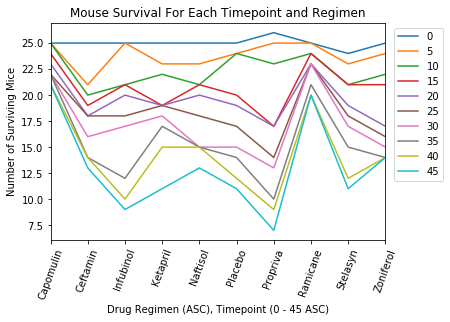

In [3]:
temp_data = merged_data.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count().to_frame()
temp_data = temp_data.sort_values(by=["Drug Regimen", "Timepoint"], ascending=False)
temp_data = temp_data.rename(columns = {"Mouse ID":"Mouse Count"})
temp_data.reset_index(inplace=True)
# temp_data.set_index("Drug Regimen", inplace=True)
axsubplot = temp_data.pivot(index="Drug Regimen", columns="Timepoint", values="Mouse Count").plot(kind="line", rot=70, title="Mouse Survival For Each Timepoint and Regimen")
plt.legend(loc=9, bbox_to_anchor=(1.1, 1.0))
# best_regimes = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# axsubplot = temp_data.plot.barh(title="Avg Tumor Volume by Timpoint For Each Regimen", rot=0, legend=False, fontsize=8)
axsubplot.set_xlabel("Drug Regimen (ASC), Timepoint (0 - 45 ASC)")
axsubplot.set_ylabel("Number of Surviving Mice")

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volumes = merged_data[["Drug Regimen", "Tumor Volume (mm3)"]].copy()

# Sort the data so we can get accurate median values
tumor_volumes = tumor_volumes.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"], ascending=True)

# Mean
tumor_agg = tumor_volumes.groupby(["Drug Regimen"]).mean()
# Median
tumor_agg["Median"] = tumor_volumes.groupby(["Drug Regimen"]).median()
# Variance
tumor_agg["Variance"] = tumor_volumes.groupby(["Drug Regimen"]).var()
# Standard Deviation
tumor_agg["Std Dev"] = tumor_volumes.groupby(["Drug Regimen"]).std()
# SEM
tumor_agg["SEM"] = tumor_volumes.groupby(["Drug Regimen"]).sem()

# Formatting, Column Renaming, Sorting etc
tumor_agg = tumor_agg.rename(columns = {"Tumor Volume (mm3)":"Mean"})

# Display our results
tumor_agg

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

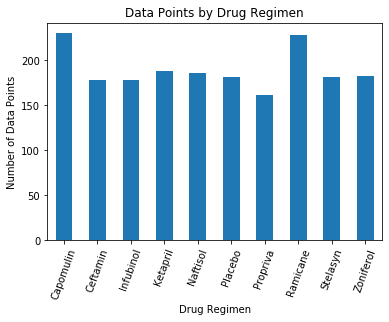

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_volumes = merged_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count().to_frame()

# Formatting, Column Renaming, Sorting etc
tumor_volumes = tumor_volumes.rename(columns = {"Tumor Volume (mm3)":"Data Point Count"})

# Display the results
axsubplot = tumor_volumes.plot.bar(title="Data Points by Drug Regimen", rot=70, legend=False)
axsubplot.set_xlabel("Drug Regimen")
axsubplot.set_ylabel("Number of Data Points")

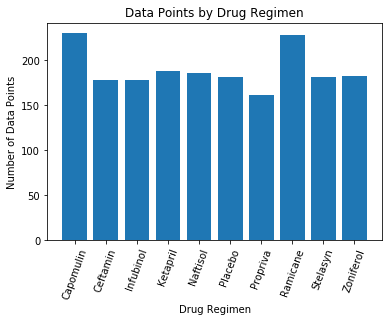

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
pltbardata = tumor_volumes.reset_index(drop=False)
plt.bar(pltbardata["Drug Regimen"], pltbardata["Data Point Count"])

# Formatting
plt.title("Data Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=70)
plt.show()

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002549620AB48>],
      dtype=object)

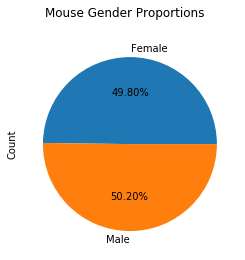

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_genders = merged_data.groupby(["Mouse ID", "Sex"])["Timepoint"].count().to_frame()
mouse_genders.reset_index(level=0, inplace=True)
mouse_genders = mouse_genders.groupby(["Sex"])["Mouse ID"].count().to_frame()

# Formatting, Column Renaming, Sorting etc
mouse_genders = mouse_genders.rename(columns={"Mouse ID":"Count"})
mouse_genders.plot.pie(subplots=True, autopct="%1.2f%%", legend=False, title="Mouse Gender Proportions")

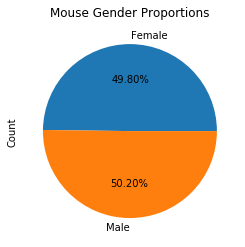

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_genders.index.values.tolist()

# Start my chart
fig, ax = plt.subplots()
plt.title("Mouse Gender Proportions")
ax.pie(mouse_genders["Count"], labels=genders, autopct="%1.2f%%")
ax.set_ylabel("Count")
plt.show()

## Final Tumor Volumes For The 4 Most Promising Treatment Regimens

Text(0.5, 0, 'Final Tumor Volume (mm3)')

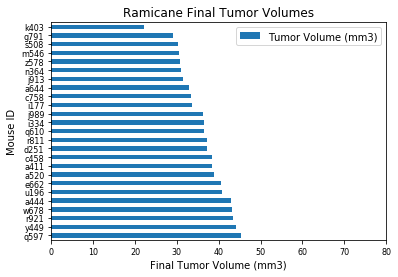

In [9]:
# Calculate the final tumor volume of each mouse 
# across four of the most promising treatment regimens:
# - Ramicane
# - Capomulin
# - Ceftamin
# - Infubinol

# Start with a unique set of Mouse IDs, Drug Regimes and max Timepoint data them remove all regimes not in our list
# our list
best_regimes = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

final_tumor_vol = best_regimes.groupby(["Mouse ID", "Drug Regimen", "Sex"])["Timepoint"].max().to_frame()
final_tumor_vol = final_tumor_vol.merge(best_regimes, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_vol = final_tumor_vol.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"], ascending=False)

# Display the results for Ramicane
final_Ramicane = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(["Ramicane"])].set_index('Mouse ID')
Ramicane_subplot = final_Ramicane["Tumor Volume (mm3)"].plot.barh(title="Ramicane Final Tumor Volumes", fontsize=8, xlim=(0,80), legend=True)
Ramicane_subplot.set_ylabel("Mouse ID")
Ramicane_subplot.set_xlabel("Final Tumor Volume (mm3)")

Text(0.5, 0, 'Final Tumor Volume (mm3)')

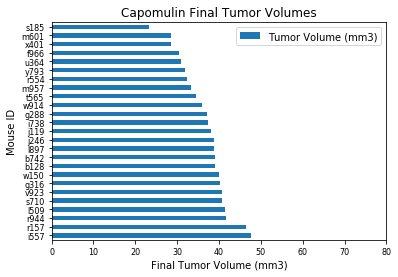

In [10]:
# Display the results for Capomulin
final_Capomulin = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(["Capomulin"])].set_index('Mouse ID')
Capomulin_subplot = final_Capomulin["Tumor Volume (mm3)"].plot.barh(title="Capomulin Final Tumor Volumes", fontsize=8, xlim=(0,80), legend=True)
Capomulin_subplot.set_ylabel("Mouse ID")
Capomulin_subplot.set_xlabel("Final Tumor Volume (mm3)")

Text(0.5, 0, 'Final Tumor Volume (mm3)')

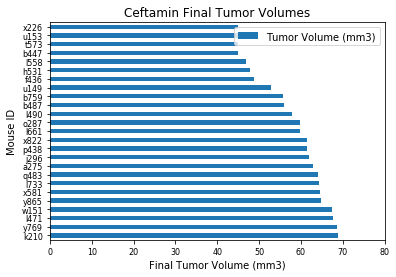

In [11]:
# Display the results for Ceftamin
final_Ceftamin = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(["Ceftamin"])].set_index('Mouse ID')
Ceftamin_subplot = final_Ceftamin["Tumor Volume (mm3)"].plot.barh(title="Ceftamin Final Tumor Volumes", fontsize=8, xlim=(0,80), legend=True)
Ceftamin_subplot.set_ylabel("Mouse ID")
Ceftamin_subplot.set_xlabel("Final Tumor Volume (mm3)")

Text(0.5, 0, 'Final Tumor Volume (mm3)')

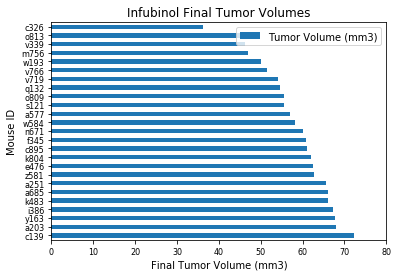

In [12]:
# Display the results for Infubinol
final_Infubinol = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(["Infubinol"])].set_index('Mouse ID')
Infubinol_subplot = final_Infubinol["Tumor Volume (mm3)"].plot.barh(title="Infubinol Final Tumor Volumes", fontsize=8, xlim=(0,80), legend=True)
Infubinol_subplot.set_ylabel("Mouse ID")
Infubinol_subplot.set_xlabel("Final Tumor Volume (mm3)")

# Regimen Summary (Quartiles etc.)

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Create our Dataframe for our Regimen Summary
regimen_summary = pd.DataFrame({"Drug Regimen":["Ramicane","Capomulin","Ceftamin","Infubinol"]})

# sort our data before calculating the Median
final_Ramicane = final_Ramicane.sort_values(by=["Tumor Volume (mm3)"], ascending=True)
final_Capomulin = final_Capomulin.sort_values(by=["Tumor Volume (mm3)"], ascending=True)
final_Ceftamin = final_Ceftamin.sort_values(by=["Tumor Volume (mm3)"], ascending=True)
final_Infubinol = final_Infubinol.sort_values(by=["Tumor Volume (mm3)"], ascending=True)

# Reset the indices
final_Ramicane = final_Ramicane.reset_index(drop=False)
final_Capomulin = final_Capomulin.reset_index(drop=False)
final_Ceftamin = final_Ceftamin.reset_index(drop=False)
final_Infubinol = final_Infubinol.reset_index(drop=False)

# Mean for the 4 best Drug Regimens
regimen_summary["Min"] = pd.DataFrame({"Min":[final_Ramicane["Tumor Volume (mm3)"].min(), 
                                              final_Capomulin["Tumor Volume (mm3)"].min(), 
                                              final_Ceftamin["Tumor Volume (mm3)"].min(), 
                                              final_Infubinol["Tumor Volume (mm3)"].min()]})

# Max for the 4 best Drug Regimens
regimen_summary["Max"] = pd.DataFrame({"Max":[final_Ramicane["Tumor Volume (mm3)"].max(), 
                                              final_Capomulin["Tumor Volume (mm3)"].max(), 
                                              final_Ceftamin["Tumor Volume (mm3)"].max(), 
                                              final_Infubinol["Tumor Volume (mm3)"].max()]})

# Mean for the 4 best Drug Regimens
regimen_summary["Mean"] = pd.DataFrame({"Mean":[final_Ramicane["Tumor Volume (mm3)"].mean(), 
                                                final_Capomulin["Tumor Volume (mm3)"].mean(), 
                                                final_Ceftamin["Tumor Volume (mm3)"].mean(), 
                                                final_Infubinol["Tumor Volume (mm3)"].mean()]})

# Median for the 4 best Drug Regimens
regimen_summary["Median"] = pd.DataFrame({"Median":[final_Ramicane["Tumor Volume (mm3)"].median(), 
                                                    final_Capomulin["Tumor Volume (mm3)"].median(), 
                                                    final_Ceftamin["Tumor Volume (mm3)"].median(), 
                                                    final_Infubinol["Tumor Volume (mm3)"].median()
                                                   ]})

# Prepare to calculate quantile information
Ramicane_Vols = final_Ramicane["Tumor Volume (mm3)"].to_frame()
Capomulin_Vols = final_Capomulin["Tumor Volume (mm3)"].to_frame()
Ceftamin_Vols = final_Ceftamin["Tumor Volume (mm3)"].to_frame()
Infubinol_Vols = final_Infubinol["Tumor Volume (mm3)"].to_frame()

# Get Quantiles for the 4 best Drug Regimens
Qs_Ramicane = Ramicane_Vols.quantile([.25, .75], axis = 0)
Qs_Capomulin = Capomulin_Vols.quantile([.25, .75], axis = 0)
Qs_Ceftamin = Ceftamin_Vols.quantile([.25, .75], axis = 0)
Qs_Infubinol = Infubinol_Vols.quantile([.25, .75], axis = 0)

# Lower Quartile for the 4 best Drug Regimens
LQ_Ramicane = Qs_Ramicane.loc[0.25]
LQ_Capomulin = Qs_Capomulin.loc[0.25]
LQ_Ceftamin = Qs_Ceftamin.loc[0.25]
LQ_Infubinol = Qs_Infubinol.loc[0.25]

# Upper Quartile for the 4 best Drug Regimens
UQ_Ramicane = Qs_Ramicane.loc[0.75]
UQ_Capomulin = Qs_Capomulin.loc[0.75]
UQ_Ceftamin = Qs_Ceftamin.loc[0.75]
UQ_Infubinol = Qs_Infubinol.loc[0.75]

# Lower Quartile for the 4 best Drug Regimens
IQR_Ramicane = UQ_Ramicane - LQ_Ramicane
IQR_Capomulin = UQ_Capomulin - LQ_Capomulin
IQR_Ceftamin = UQ_Ceftamin - LQ_Ceftamin
IQR_Infubinol = UQ_Infubinol - LQ_Infubinol

# Stick all of that stuff into our Regimen Dataframe
regimen_summary["LQ"] = pd.DataFrame({"LQ":[LQ_Ramicane["Tumor Volume (mm3)"], 
                                            LQ_Capomulin["Tumor Volume (mm3)"], 
                                            LQ_Ceftamin["Tumor Volume (mm3)"], 
                                            LQ_Infubinol["Tumor Volume (mm3)"]
                                           ]})
regimen_summary["UQ"] = pd.DataFrame({"UQ":[UQ_Ramicane["Tumor Volume (mm3)"], 
                                            UQ_Capomulin["Tumor Volume (mm3)"], 
                                            UQ_Ceftamin["Tumor Volume (mm3)"], 
                                            UQ_Infubinol["Tumor Volume (mm3)"]
                                           ]})
regimen_summary["IQR"] = pd.DataFrame({"IQR":[IQR_Ramicane["Tumor Volume (mm3)"], 
                                              IQR_Capomulin["Tumor Volume (mm3)"], 
                                              IQR_Ceftamin["Tumor Volume (mm3)"], 
                                              IQR_Infubinol["Tumor Volume (mm3)"]
                                             ]})

regimen_summary["LBound"] = regimen_summary["LQ"] - (1.5 * regimen_summary["IQR"])
regimen_summary["UBound"] = regimen_summary["UQ"] + (1.5 * regimen_summary["IQR"])

# Display the Regimen Summary
regimen_summary
# print(regimen_summary)

,Drug Regimen,Min,Max,Mean,Median,LQ,UQ,IQR,LBound,UBound
0,Ramicane,22.050126,45.220869,36.191390,36.561652,31.560470,40.659006,9.098537,17.912664,54.306811
1,Capomulin,23.343598,47.685963,36.667568,38.125164,32.377357,40.159220,7.781863,20.704562,51.832015
2,Ceftamin,45.000000,68.923185,57.753977,59.851956,48.722078,64.299830,15.577752,25.355450,87.666458
3,Infubinol,36.321346,72.226731,58.178246,60.165180,54.048608,65.525743,11.477135,36.832905,82.741446


# Determine If Any Outliers Exist In Any Of The Treatment Regimens

In [14]:
# Outliers
for index in range(4):
    if index == 0:
        outliers = Ramicane_Vols.loc[Ramicane_Vols["Tumor Volume (mm3)"] < regimen_summary.iloc[index, 8]] | Ramicane_Vols.loc[Ramicane_Vols["Tumor Volume (mm3)"] > regimen_summary.iloc[index, 9]]
        outliers = outliers.rename(columns={"Tumor Volume (mm3)":"Ramicane Outliers"})
        if len(outliers["Ramicane Outliers"]) == 0:
            print("The Ramicane regimen did not have any statistical outliers.")
        else:
            print("The Ramicane regimen had outliers.")
    elif index == 1:
        outliers = Capomulin_Vols.loc[Capomulin_Vols["Tumor Volume (mm3)"] < regimen_summary.iloc[index, 8]] | Capomulin_Vols.loc[Capomulin_Vols["Tumor Volume (mm3)"] > regimen_summary.iloc[index, 9]]
        outliers = outliers.rename(columns={"Tumor Volume (mm3)":"Capomulin Outliers"})
        if len(outliers["Capomulin Outliers"]) == 0:
            print("The Capomulin regimen did not have any statistical outliers.")
        else:
            print("The Capomulin regimen had outliers.")
    elif index == 2:
        outliers = Ceftamin_Vols.loc[Ceftamin_Vols["Tumor Volume (mm3)"] < regimen_summary.iloc[index, 8]] | Ceftamin_Vols.loc[Ceftamin_Vols["Tumor Volume (mm3)"] > regimen_summary.iloc[index, 9]]
        outliers = outliers.rename(columns={"Tumor Volume (mm3)":"Ceftamin Outliers"})
        if len(outliers["Ceftamin Outliers"]) == 0:
            print("The Ceftamin regimen did not have any statistical outliers.")
        else:
            print("The Ceftamin regimen had outliers.")
    elif index == 3:
        outliers = Infubinol_Vols.loc[Infubinol_Vols["Tumor Volume (mm3)"] < regimen_summary.iloc[index, 8]] | Infubinol_Vols.loc[Infubinol_Vols["Tumor Volume (mm3)"] > regimen_summary.iloc[index, 9]]
        outliers = outliers.rename(columns={"Tumor Volume (mm3)":"Infubinol Outliers"})
        if len(outliers["Infubinol Outliers"]) == 0:
            print("The Infubinol regimen did not have any statistical outliers.")
        else:
            print("The Infubinol regimen had outliers.")

The Ramicane regimen did not have any statistical outliers.
The Capomulin regimen did not have any statistical outliers.
The Ceftamin regimen did not have any statistical outliers.
The Infubinol regimen had outliers.


# Box Plot Of The Final Tumor Volume Of All Mice In Each Regimen

# Outliers Identified As GREEN SQUARES

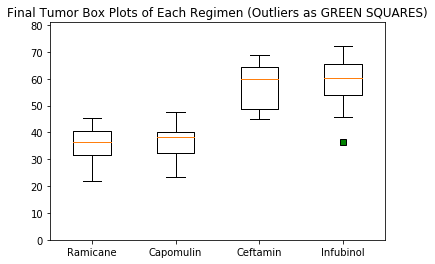

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Mouse_BoxPlots = {"Ramicane": final_Ramicane["Tumor Volume (mm3)"], 
            "Capomulin": final_Capomulin["Tumor Volume (mm3)"], 
            "Ceftamin": final_Ceftamin["Tumor Volume (mm3)"], 
            "Infubinol": final_Infubinol["Tumor Volume (mm3)"]}

fig, ax = plt.subplots()
plt.title("Final Tumor Box Plots of Each Regimen (Outliers as GREEN SQUARES)")
ax.boxplot(Mouse_BoxPlots.values(), showfliers=True, flierprops={"markerfacecolor":'g', "marker":'s'})
ax.set_xticklabels(Mouse_BoxPlots.keys())
ax.set_ylim(0,81)
plt.show()

## Line and scatter plots
# Line Plot Of A Single Mouse (s185)

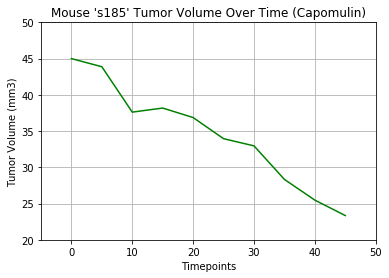

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_data = merged_data[merged_data["Mouse ID"].isin(["s185"])].set_index('Mouse ID')

# Collect the mean unemployment rates for the world
mouse_tvolumes = s185_data["Tumor Volume (mm3)"]

# Collect the years where data was collected
mouse_timepoints = s185_data["Timepoint"]

# Plot the world average as a line chart
plt.plot(mouse_timepoints, mouse_tvolumes, color="g")

# Formatting
plt.title("Mouse 's185' Tumor Volume Over Time (Capomulin)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.ylim((20,50))
plt.xlim((-5,50))

# Show the chart
plt.show()

# Scatter Plot Of Mouse Weight v. Avg Tumor Volume (Capomulin)

Text(0.5, 1.0, 'Mouse Weight v. Average Tumor Volume (Capomulin)')

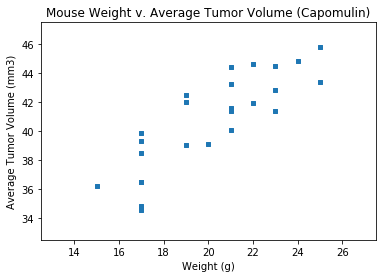

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatter = merged_data[merged_data["Drug Regimen"].isin(["Capomulin"])].set_index('Drug Regimen')
Capomulin_scatter = Capomulin_scatter.groupby(["Drug Regimen", "Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().to_frame()

# Because one of our columns that we need to plot is part of an index, we must reset our index
Capomulin_scatter.reset_index(inplace=True)

# Plot this bad boy
ax = Capomulin_scatter.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", marker="s")

# Formatting
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_xlim(12.5, 27.5)
ax.set_ylim(32.5, 47.5)
plt.title("Mouse Weight v. Average Tumor Volume (Capomulin)")

# Linear Regression Model
# Mouse Weight v. Avg Tumor Volume (Capomulin)

Text(0.5, 1.0, 'Linear Regression Model: Mouse Weight v. Average Tumor Volume (Capomulin)')

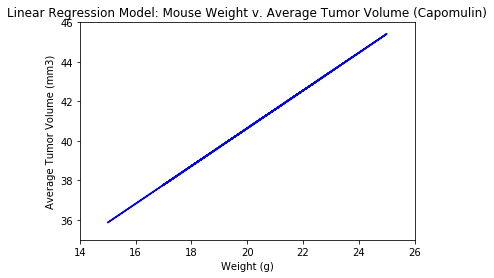

In [18]:
# Calculate the correlation coefficient and linear regression model for
# mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_scatter["Weight (g)"]
y_values = Capomulin_scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values (mx+b)
regress_values = x_values * slope + intercept

# Plot our results
ax = plt.plot(x_values, regress_values, "b-")

# Formatting
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14, 26)
plt.ylim(35, 46)
plt.title("Linear Regression Model: Mouse Weight v. Average Tumor Volume (Capomulin)")